In [1]:
import numpy as np
import pandas as pd

In [2]:
matches = pd.read_csv(r'IPL_Matches_Result_2008_2022.csv')
delivery = pd.read_csv(r'IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
matches.shape

(950, 20)

In [5]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
delivery.shape

(225954, 17)

In [7]:
#Every match both innings total run scored
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score_df

C:\conda_temp\ipykernel_16808\3682334958.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()


,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [8]:
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [9]:
#merging both dataset by id and total_run
match_df = matches.merge(total_score_df[['ID','total_run']], left_on ='ID', right_on ='ID')
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [10]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [66]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [12]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [13]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [14]:
match_df.shape

(806, 21)

In [15]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma,159
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,...,Rajasthan Royals,Wickets,5.0,NaN,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan,150
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,Sunrisers Hyderabad,Runs,3.0,NaN,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [16]:
match_df['method'] = match_df['method'].replace(np.nan, 0)

In [17]:
match_df['method'].value_counts()

0      791
D/L     15
Name: method, dtype: int64

In [18]:
#Removing all rain affected matches
match_df = match_df[match_df['method'] == 0 ]

In [19]:
match_df = match_df[['ID','City','WinningTeam','total_run','Team1','Team2']]

In [20]:
#Merging both datasets with respect to ID
delivery_df = match_df.merge(delivery,on = 'ID')
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,1,V Kohli,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,2,V Kohli,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
2,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,3,F du Plessis,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
3,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,4,V Kohli,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
4,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,5,V Kohli,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [21]:
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

In [22]:
# bowling Team col creation
delivery_df['BowlingTeam'] = delivery_df['BattingTeam']
delivery_df.loc[delivery_df['BattingTeam'] == delivery_df['Team1'], 'BowlingTeam'] = delivery_df['Team2']
delivery_df.loc[delivery_df['BattingTeam'] == delivery_df['Team2'], 'BowlingTeam'] = delivery_df['Team1']

In [23]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,1,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
1,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,2,V Kohli,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
2,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,3,F du Plessis,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
3,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,4,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
4,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,1,0,5,V Kohli,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [24]:
#Filtering for only second innings 
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [25]:
delivery_df.shape

(91595, 23)

In [26]:
#Runs scored per ball
delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']

C:\conda_temp\ipykernel_16808\2559531253.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']
C:\conda_temp\ipykernel_16808\2559531253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']


In [27]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
127,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0
128,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0
129,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,6
130,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10
131,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82


In [28]:
#delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
#delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

#delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
#delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [29]:
#total_runs_x - current_score = runs left
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

C:\conda_temp\ipykernel_16808\3639216939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']


In [30]:
#After every ball bowled how many balls are left 
delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

C:\conda_temp\ipykernel_16808\814634355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])


In [31]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left
127,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,119
128,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,118
129,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,6,151,117
130,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,116
131,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,0,0,NaN,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,142,31
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,30
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,29
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,140,29


In [32]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')

#After every ball in a particular match how many wickets are fallen  
wickets_left = delivery_df.groupby('ID').cumsum()['player_out'].values

# wickets left
delivery_df['wickets_left'] = 10 - wickets_left
delivery_df

C:\conda_temp\ipykernel_16808\2416786029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
C:\conda_temp\ipykernel_16808\2416786029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
C:\conda_temp\ipykernel_16808\2416786029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left
127,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,0,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,119,10
128,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,0,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,118,10
129,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,0,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,6,151,117,10
130,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,0,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,116,10
131,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,0,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,142,31,1
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,30,1
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,29,1
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,140,29,1


In [33]:
# CRR = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df

C:\conda_temp\ipykernel_16808\3863439022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr
127,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,119,10,0.000000
128,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,118,10,0.000000
129,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,6,151,117,10,12.000000
130,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,116,10,15.000000
131,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,0,NaN,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,115,10,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189345,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,80,142,31,1,5.393258
189346,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,30,1,5.400000
189347,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,81,141,29,1,5.340659
189348,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,82,140,29,1,5.406593


In [61]:
# RRR = runs left/ over left
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df.sample(delivery_df.shape[0])

C:\conda_temp\ipykernel_16808\3340465671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
65862,1136570,Kolkata,Sunrisers Hyderabad,138,Kolkata Knight Riders,Sunrisers Hyderabad,2,6,6,KS Williamson,...,NaN,Sunrisers Hyderabad,Kolkata Knight Riders,49,89,78,8,7.000000,6.846154,1
150660,419157,Bangalore,Mumbai Indians,191,Royal Challengers Bangalore,Mumbai Indians,2,12,1,V Kohli,...,NaN,Royal Challengers Bangalore,Mumbai Indians,79,112,47,5,6.493151,14.297872,0
79863,980935,Hyderabad,Sunrisers Hyderabad,143,Sunrisers Hyderabad,Punjab Kings,2,0,6,DA Warner,...,NaN,Sunrisers Hyderabad,Punjab Kings,6,137,114,10,6.000000,7.210526,1
131993,548343,Chennai,Punjab Kings,156,Chennai Super Kings,Punjab Kings,2,5,6,S Badrinath,...,NaN,Chennai Super Kings,Punjab Kings,48,108,84,9,8.000000,7.714286,0
87085,829783,Mumbai,Mumbai Indians,152,Mumbai Indians,Delhi Capitals,2,9,3,AT Rayudu,...,NaN,Mumbai Indians,Delhi Capitals,59,93,63,6,6.210526,8.857143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147852,501203,Kolkata,Kolkata Knight Riders,163,Kolkata Knight Riders,Sunrisers Hyderabad,2,17,2,DW Steyn,...,NaN,Sunrisers Hyderabad,Kolkata Knight Riders,128,35,16,3,7.384615,13.125000,0
92473,829731,Visakhapatnam,Delhi Capitals,167,Sunrisers Hyderabad,Delhi Capitals,2,17,6,KV Sharma,...,NaN,Sunrisers Hyderabad,Delhi Capitals,145,22,12,4,8.055556,11.000000,0
13360,1254110,Dubai,Delhi Capitals,136,Chennai Super Kings,Delhi Capitals,2,12,1,S Dhawan,...,NaN,Delhi Capitals,Chennai Super Kings,89,47,47,7,7.315068,6.000000,1
167857,392220,Kimberley,Sunrisers Hyderabad,166,Sunrisers Hyderabad,Rajasthan Royals,2,3,2,LA Carseldine,...,NaN,Rajasthan Royals,Sunrisers Hyderabad,15,151,100,9,4.500000,9.060000,0


In [35]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [36]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
final_df = delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr','result']]

C:\conda_temp\ipykernel_16808\1751967604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [37]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
150928,Sunrisers Hyderabad,Punjab Kings,Dharamsala,47,29,6,174,8.373626,9.724138,1
79698,Punjab Kings,Mumbai Indians,Chandigarh,70,33,8,189,8.206897,12.727273,0
150403,Kolkata Knight Riders,Rajasthan Royals,Kolkata,84,77,8,132,6.697674,6.545455,1
124783,Mumbai Indians,Chennai Super Kings,Bangalore,108,58,6,187,7.645161,11.172414,0
144691,Punjab Kings,Delhi Capitals,Delhi,140,68,9,231,10.500000,12.352941,0
...,...,...,...,...,...,...,...,...,...,...
79400,Mumbai Indians,Kolkata Knight Riders,Mumbai,137,95,9,174,8.880000,8.652632,1
94572,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,158,101,10,177,6.000000,9.386139,1
114899,Punjab Kings,Royal Challengers Bangalore,Chandigarh,177,106,10,190,5.571429,10.018868,1
1154,Mumbai Indians,Sunrisers Hyderabad,Mumbai,89,46,8,193,8.432432,11.608696,0


In [38]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
75842,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,62,36,7,171,7.785714,10.333333,0


In [39]:
final_df.isnull().sum()

BattingTeam        0
BowlingTeam        0
City            6012
runs_left          0
balls_left         0
wickets_left       0
total_run_x        0
crr                0
rrr               12
result             0
dtype: int64

In [40]:
final_df.dropna(inplace=True)

C:\conda_temp\ipykernel_16808\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [41]:
final_df = final_df[final_df['balls_left'] !=0 ]

In [42]:
#Model

In [43]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [44]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
118768,Chennai Super Kings,Rajasthan Royals,Chennai,31,23,7,185,9.525773,8.086957
19059,Royal Challengers Bangalore,Punjab Kings,Ahmedabad,168,112,10,179,8.250000,9.000000
50887,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,38,31,8,158,8.089888,7.354839
111092,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,85,100,8,106,6.300000,5.100000
112055,Rajasthan Royals,Mumbai Indians,Mumbai,78,44,5,166,6.947368,10.636364
...,...,...,...,...,...,...,...,...,...
53828,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,111,60,9,181,7.000000,11.100000
164647,Kolkata Knight Riders,Rajasthan Royals,Durban,93,118,10,101,24.000000,4.728814
116506,Punjab Kings,Mumbai Indians,Mumbai,160,106,9,174,6.000000,9.056604
10934,Kolkata Knight Riders,Chennai Super Kings,Dubai,187,117,10,192,10.000000,9.589744


In [45]:
#To convert string to int
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False, drop='first'),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [47]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver = 'liblinear'))
])

In [48]:
#pipe = Pipeline(steps=[
#    ('step1',trf),
#    ('step2',RandomForestClassifier())
#])

In [49]:
pipe.fit(X_train,y_train)

C:\Users\Jai kattimani\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [50]:
y_pred = pipe.predict(X_test)

In [51]:
#Logistic 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8092614302461899

In [52]:
#RandomForectClassifier
#pipe.predict_proba(X_test)[1]

In [53]:
pipe.predict_proba(X_test)[10]

array([0.64845927, 0.35154073])

In [54]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))
    

In [55]:
delivery_df[delivery_df['ID']== 1312199]

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
127,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,119,10,0.000000,7.915966,1
128,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,118,10,0.000000,7.983051,1
129,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,6,151,117,10,12.000000,7.743590,1
130,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,116,10,15.000000,7.603448,1
131,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,10,147,115,10,12.000000,7.669565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,3,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,151,6,15,7,8.628571,2.400000,1
232,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,4,SO Hetmyer,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,152,5,14,7,8.603774,2.142857,1
233,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,5,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,154,3,13,7,8.635514,1.384615,1
234,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,6,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,155,2,12,7,8.611111,1.000000,1


In [56]:
def match_progression(x_df,ID,pipe):
    match = x_df[x_df['ID'] == ID]
    print(match)
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [63]:
ball_by_ball_data = delivery_df
temp_df,target = match_progression(ball_by_ball_data,548343,pipe)
temp_df


            ID     City   WinningTeam  total_run_x                Team1  \
131958  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
131959  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
131960  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
131961  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
131962  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
...        ...      ...           ...          ...                  ...   
132076  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
132077  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
132078  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
132079  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
132080  548343  Chennai  Punjab Kings          156  Chennai Super Kings   

               Team2  innings  overs  ballnumber           batter  ...  \
131958  Punjab Kings     

,end_of_over,runs_after_over,wickets_in_over,lose,win
131963,1,2,0,50.0,50.0
131969,2,6,0,47.9,52.1
131975,3,12,0,36.3,63.7
131981,4,11,0,27.9,72.1
131987,5,14,0,17.8,82.2
131993,6,3,1,31.8,68.2
131999,7,9,0,26.8,73.2
132005,8,6,1,39.1,60.9
132011,9,3,0,43.0,57.0
132017,10,3,0,47.0,53.0


Text(0.5, 1.0, 'Target-156')

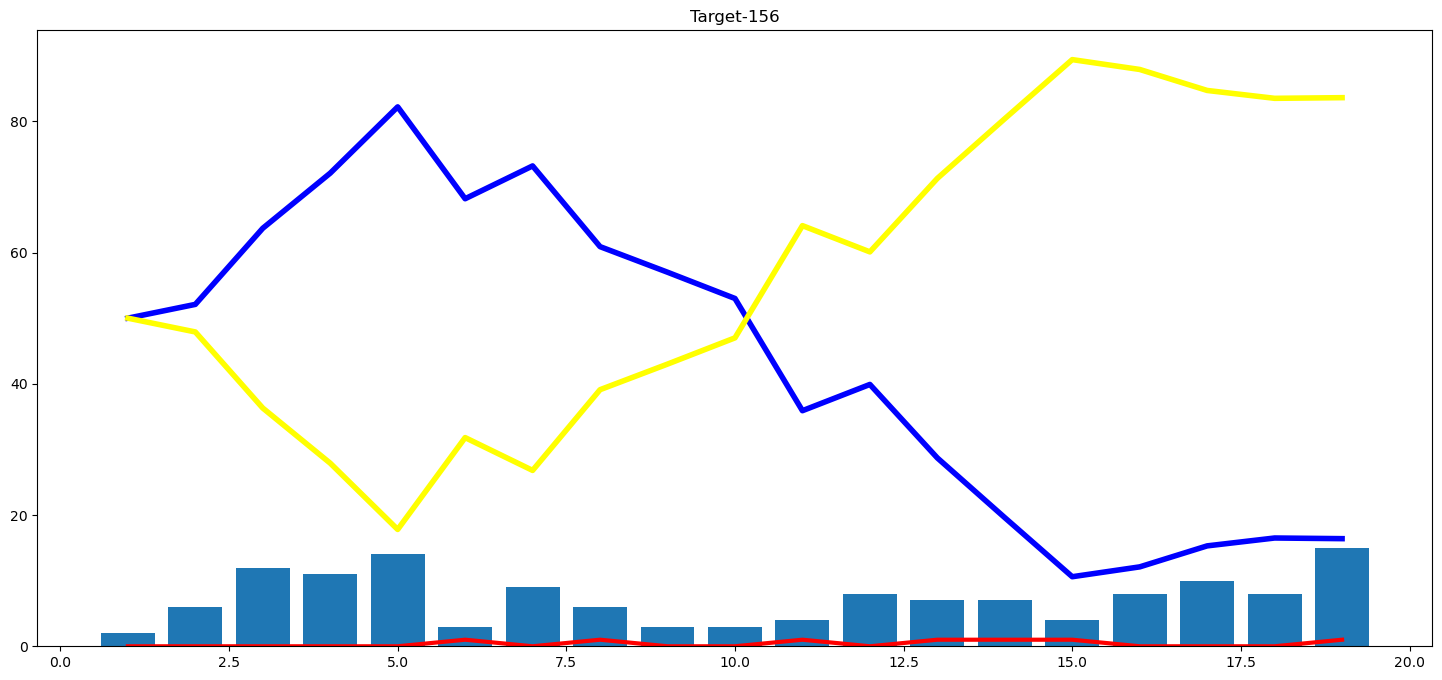

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='red',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='yellow',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [67]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [69]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai', 'Sharjah',
       'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad', 'Visakhapatnam',
       'Chandigarh', 'Bengaluru', 'Kolkata', 'Jaipur', 'Indore',
       'Bangalore', 'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [70]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))